1. Import Libraries

In [2]:
#Importing basic libraries
import pandas as pd
import numpy as np

#importing Visualization libraries
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Libraries to read the documnets
import os
import win32com.client as win32
import docx2txt
import PyPDF2

In [4]:
# Importing Libraries to clean data
import spacy
import string
import nltk
from nltk.tokenize import word_tokenize
import string 
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import FreqDist


In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Vijaya
[nltk_data]     Lakshmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nlp = spacy.load('en_core_web_sm') 

In [7]:
# Importing Libraries which can transform the text data for model building
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
# Importing Libraries to build models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [9]:
# Importing Libraries to check the model performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [61]:
# Importing model validation techniques
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score

2. Extarct data from Datasets

In [11]:
# Loading the data
reactpath = 'C:\\Users\\Vijaya Lakshmi\\Desktop\\ExcelR_Projects\\Resume_classification\\Resumes\\React'
peoplepath = 'C:\\Users\\Vijaya Lakshmi\\Desktop\\ExcelR_Projects\\Resume_classification\\Resumes\\Peoplesoft resumes'
sqlpath = 'C:\\Users\\Vijaya Lakshmi\\Desktop\\ExcelR_Projects\\Resume_classification\\Resumes\\SQL Developer Lightning insight'
workdaypath = 'C:\\Users\\Vijaya Lakshmi\\Desktop\\ExcelR_Projects\\Resume_classification\\Resumes\\workday resumes'

2.1 Extracting the data from React resume folder

In [12]:
def get_resume_text(reactpath, file):
    if file.endswith('.docx'):
        text = docx2txt.process(reactpath)
        return text
    

    elif file.endswith('.doc'):
        word = win32.gencache.EnsureDispatch('Word.Application')
        doc = word.Documents.Open(reactpath)
        text = doc.Content.Text
        doc.Close()
        return text
    
    elif file.endswith('.pdf'):
        with open(reactpath, 'rb') as f:
            reader = PyPDF2.PdfReader(f)
            text = ""
            for page in reader.pages:
                text += page.extract_text()
        return text
    else:
        return 'unable to find or read .pdf'

data = []
for file_name in os.listdir(reactpath):
    file_path = os.path.join(reactpath, file_name)
    text = get_resume_text(file_path, file_name)
    if text:
        data.append({'category': 'React developers', 'resume': text})

react_df = pd.DataFrame(data)

react_df


,category,resume
0,React developers,Name: Ravali P \n\n\n\n ...
1,React developers,SUSOVAN BAG \n\nSeeking a challenging po...
2,React developers,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...
3,React developers,HARIPRIYA BATTINA \n\nExperience as UI Develop...
4,React developers,KAMALAKAR REDDY. A \n\nLinked In: https://www....
5,React developers,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
6,React developers,\r\r PROFILE\rSearching for the opportunity ...
7,React developers,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...
8,React developers,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge..."
9,React developers,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...


2.2 Extracting the data from Peoplesoft resume folder

In [13]:
def get_resume_text(peoplepath, file):
    if file.endswith('.docx'):
        text = docx2txt.process(peoplepath)
        return text
    

    elif file.endswith('.doc'):
        word = win32.gencache.EnsureDispatch('Word.Application')
        doc = word.Documents.Open(peoplepath)
        text = doc.Content.Text
        doc.Close()
        return text    
    elif file.endswith('.pdf'):
        with open(reactpath, 'rb') as f:
            reader = PyPDF2.PdfReader(f)
            text = ""
            for page in reader.pages:
                text += page.extract_text()
        return text
    
    elif file.endswith('.pdf'):
        with open(peoplepath, 'rb') as f:
            reader = PyPDF2.PdfReader(f)
            text = ""
            for page in reader.pages:
                text += page.extract_text()
        return text
    else:
        return 'unable to find or read .doc'
    
data = []
for file_name in os.listdir(peoplepath):
    file_path = os.path.join(peoplepath, file_name)
    text = get_resume_text(file_path, file_name)
    if text:
        data.append({'category': 'PeopleSoft', 'resume': text})

people_df = pd.DataFrame(data)

people_df

,category,resume
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2,PeopleSoft,PeopleSoft Database Administrator\r ...
3,PeopleSoft,Classification: Internal\n\nClassification: In...
4,PeopleSoft,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo..."
5,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
6,PeopleSoft,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...
7,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
8,PeopleSoft,Vinod Akkala ...
9,PeopleSoft,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...


2.3 Extarcting data from SQL Developer resume folder

In [14]:
def get_resume_text(sqlpath, file):
    if file.endswith('.docx'):
        text = docx2txt.process(sqlpath)
        return text
    

    elif file.endswith('.doc'):
        word = win32.gencache.EnsureDispatch('Word.Application')
        doc = word.Documents.Open(sqlpath)
        text = doc.Content.Text
        doc.Close()
        return text

    elif file.endswith('.pdf'):
        with open(sqlpath, 'rb') as f:
            reader = PyPDF2.PdfReader(f)
            text = ""
            for page in reader.pages:
                text += page.extract_text()
        return text
    
    else:
        return 'unable to find or read .doc'
data = []
for file_name in os.listdir(sqlpath):
    file_path = os.path.join(sqlpath, file_name)
    text = get_resume_text(file_path, file_name)
    if text:
        data.append({'category': 'SQL developers', 'resume': text})

sql_df = pd.DataFrame(data)

sql_df

,category,resume
0,SQL developers,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...
1,SQL developers,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...
2,SQL developers,BUDDHA VAMSI ...
3,SQL developers,KAMBALLA PRADEEP ...
4,SQL developers,\r\r Hyderabad\rNazeer Basha\rSQL and Power...
5,SQL developers,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...
6,SQL developers,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...
7,SQL developers,SQL SER...
8,SQL developers,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...
9,SQL developers,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...


2.4 Extarcting data from Work day resume folder

In [15]:
def get_resume_text(workdaypath, file):
    if file.endswith('.docx'):
        text = docx2txt.process(workdaypath)
        return text
    

    elif file.endswith('.doc'):
        word = win32.gencache.EnsureDispatch('Word.Application')
        doc = word.Documents.Open(workdaypath)
        text = doc.Content.Text
        doc.Close()
        return text
    
    elif file.endswith('.pdf'):
        with open(workdaypath, 'rb') as f:
            reader = PyPDF2.PdfReader(f)
            text = ""
            for page in reader.pages:
                text += page.extract_text()
        return text
    else:
        return 'unable to find or read .pdf'
    
data = []
for file_name in os.listdir(workdaypath):
    file_path = os.path.join(workdaypath, file_name)
    text = get_resume_text(file_path, file_name)
    if text:
        data.append({'category': 'WorkDay', 'resume': text})

work_df = pd.DataFrame(data)

work_df

,category,resume
0,WorkDay,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
1,WorkDay,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
2,WorkDay,Hari Krishna M\r\r\rSummary:\rA result oriente...
3,WorkDay,Harikrishna Akula ...
4,WorkDay,HIMA.MENDU\r \r\rCareer Objective\rTo continu...
5,WorkDay,G Himaja\n\n ...
6,WorkDay,\t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\r\t\rP...
7,WorkDay,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
8,WorkDay,\t\t\t\t\tMadeeswar A\r\t\r\t\rPROFILE SUMMARY...
9,WorkDay,Mooraboyina Guravaiah\n\nWorkday Integration S...


3. Joining all the resume data frames

In [16]:
resume_df = pd.concat([react_df, people_df, sql_df, work_df])
resume_df

,category,resume
0,React developers,Name: Ravali P \n\n\n\n ...
1,React developers,SUSOVAN BAG \n\nSeeking a challenging po...
2,React developers,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...
3,React developers,HARIPRIYA BATTINA \n\nExperience as UI Develop...
4,React developers,KAMALAKAR REDDY. A \n\nLinked In: https://www....
...,...,...
16,WorkDay,\tWorkday Integration Consultant\r\rName ...
17,WorkDay,Srikanth (WORKDAY hCM Consultant)\t ...
18,WorkDay,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
19,WorkDay,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...


4. EDA and Text Cleaning

In [17]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  79 non-null     object
 1   resume    79 non-null     object
dtypes: object(2)
memory usage: 1.9+ KB


In [18]:
resume_df.duplicated().sum()

0

In [19]:
resume_df.shape

(79, 2)

In [20]:
resume_df.describe()

,category,resume
count,79,79
unique,4,79
top,React developers,Name: Ravali P \n\n\n\n ...
freq,24,1


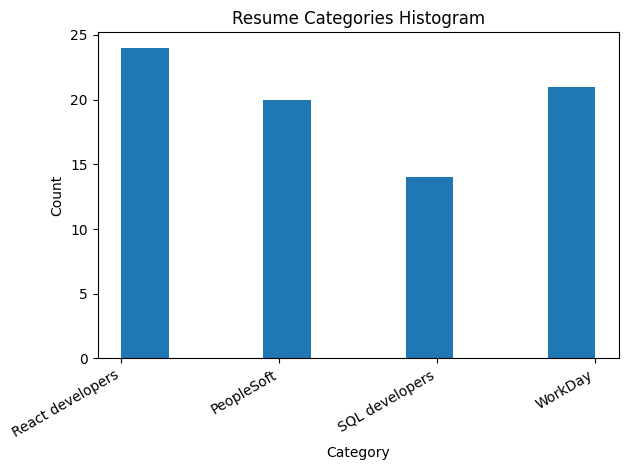

In [21]:
plt.hist(resume_df['category'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Resume Categories Histogram')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

In [22]:
type(resume_df)

pandas.core.frame.DataFrame

3.1 Cleaning the data

In [23]:
stop = stopwords.words('english')
result = string.punctuation

In [24]:
#removing http links
resume_no_link = resume_df["resume"].apply(lambda x: re.sub(r'http\S+', '', x))
# Splitting the text into individual words or tokens.
resume = resume_no_link.apply(word_tokenize)
# Converting all the words to lower case
low_resume = resume.apply(lambda x: [word.lower() for word in x])
#removing the stop words for the data
s_word = low_resume.apply(lambda x: [word for word in x if word not in stop])
#removing punctuations
no_punc = s_word.apply(lambda x: [word for word in x if word not in result])

In [25]:
# Function to remove symbols from a word
def remove_symbols(word):
    return re.sub(r'[^\w\s]', '', word)
for i in range(2):

# Remove symbols and single-letter words, looping the code to run twice for clear data
    punch = no_punc.apply(lambda x: [remove_symbols(word) for word in x if len(word) > 1])
punch

0     [name, ravali, curriculum, vitae, specializati...
1     [susovan, bag, seeking, challenging, position,...
2     [kanumuru, deepak, reddy, career, objective, s...
3     [haripriya, battina, experience, ui, developer...
4     [kamalakar, reddy, linked, professional, summa...
                            ...                        
16    [workday, integration, consultant, name, sri, ...
17    [srikanth, workday, hcm, consultant, seeking, ...
18    [workday, hcm, fcm, name, kumar, ss, role, wor...
19    [venkateswarlub, workday, consultant, 53, year...
20    [vinay, kumar, v, workday, functional, consult...
Name: resume, Length: 79, dtype: object

In [26]:
# Join the tokenized, punctuation-removed resume data
clean = punch. apply(' '.join)
clean

0     name ravali curriculum vitae specialization co...
1     susovan bag seeking challenging position field...
2     kanumuru deepak reddy career objective secure ...
3     haripriya battina experience ui developer reac...
4     kamalakar reddy linked professional summary ye...
                            ...                        
16    workday integration consultant name sri krishn...
17    srikanth workday hcm consultant seeking suitab...
18    workday hcm fcm name kumar ss role workday con...
19    venkateswarlub workday consultant 53 years exp...
20    vinay kumar v workday functional consultant ex...
Name: resume, Length: 79, dtype: object

In [27]:
# we can oberve that there is extra space in between few words, passing lambda function to clear them
cleaned = clean.apply(lambda x: re.sub(' +', ' ', x))
cleaned

0     name ravali curriculum vitae specialization co...
1     susovan bag seeking challenging position field...
2     kanumuru deepak reddy career objective secure ...
3     haripriya battina experience ui developer reac...
4     kamalakar reddy linked professional summary ye...
                            ...                        
16    workday integration consultant name sri krishn...
17    srikanth workday hcm consultant seeking suitab...
18    workday hcm fcm name kumar ss role workday con...
19    venkateswarlub workday consultant 53 years exp...
20    vinay kumar v workday functional consultant ex...
Name: resume, Length: 79, dtype: object

In [28]:
cleaned_data = pd.DataFrame({'category': resume_df['category'], "clean_resume" : cleaned})
cleaned_data

,category,clean_resume
0,React developers,name ravali curriculum vitae specialization co...
1,React developers,susovan bag seeking challenging position field...
2,React developers,kanumuru deepak reddy career objective secure ...
3,React developers,haripriya battina experience ui developer reac...
4,React developers,kamalakar reddy linked professional summary ye...
...,...,...
16,WorkDay,workday integration consultant name sri krishn...
17,WorkDay,srikanth workday hcm consultant seeking suitab...
18,WorkDay,workday hcm fcm name kumar ss role workday con...
19,WorkDay,venkateswarlub workday consultant 53 years exp...


3.2 WORD COUNT

In [29]:
r_df =resume_df['resume'].str.len().sum()
cle = cleaned.str.len().sum()
cleaned_data_count = pd.DataFrame({
    'Category':['actual word count ', 
                'cleaned word count',
        '**words removed**'] ,
        'Count':[r_df, cle, (int(r_df)- int(cle))]})
cleaned_data_count

,Category,Count
0,actual word count,429164
1,cleaned word count,336820
2,**words removed**,92344


3.3 Text processing

In [30]:
ps = PorterStemmer()    
stemmed_tokens = [ps.stem(word) for word in cleaned]
#lemmatization
s_lemm = nlp(''.join(str(stemmed_tokens)))
lemming = [token.lemma_ for token in s_lemm]
lemming

['[',
 "'",
 'name',
 'ravali',
 'curriculum',
 'vitae',
 'specialization',
 'computer',
 'science',
 'engg',
 'ee',
 'ob',
 'je',
 'ct',
 'ee',
 'ob',
 'je',
 'ct',
 'utilize',
 'technical',
 'skill',
 'achieve',
 'target',
 'develop',
 'good',
 'performance',
 'organization',
 'ion',
 'ion',
 'degreecourse',
 'collegeinstitute',
 'university',
 'board',
 'percentage',
 'cgpa',
 'year',
 'pass',
 'cgpacgpa',
 'institute',
 'technology',
 'vtu',
 '65',
 'cgpa',
 '2021',
 'diploma',
 'aryabharathi',
 'polytechnic',
 'karnataka',
 'state',
 'board',
 'technical',
 'examination',
 'bengaluru',
 '60',
 '2017',
 'sslc',
 'empress',
 'girl',
 'high',
 'school',
 'karnataka',
 'secondary',
 'education',
 'board',
 '528',
 '2011',
 'manual',
 'testing',
 'skill',
 'strong',
 'knowledge',
 'sdlc',
 'concept',
 'extensive',
 'knowledge',
 'white',
 'box',
 'test',
 'good',
 'knowledge',
 'functional',
 'testing',
 'integration',
 'testing',
 'extreme',
 'knowledge',
 'system',
 'test',
 'good',


In [31]:
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(lemming)
vectorizer.vocabulary_

{'name': 2730,
 'ravali': 3340,
 'curriculum': 1246,
 'vitae': 4348,
 'specialization': 3799,
 'computer': 1075,
 'science': 3615,
 'engg': 1575,
 'ee': 1510,
 'ob': 2829,
 'je': 2282,
 'ct': 1234,
 'utilize': 4272,
 'technical': 4033,
 'skill': 3751,
 'achieve': 404,
 'target': 4011,
 'develop': 1384,
 'good': 1898,
 'performance': 3029,
 'organization': 2907,
 'ion': 2246,
 'degreecourse': 1329,
 'collegeinstitute': 1029,
 'university': 4231,
 'board': 809,
 'percentage': 3026,
 'cgpa': 952,
 'year': 4495,
 'pass': 2984,
 'cgpacgpa': 953,
 'institute': 2189,
 'technology': 4047,
 'vtu': 4373,
 '65': 260,
 '2021': 171,
 'diploma': 1413,
 'aryabharathi': 626,
 'polytechnic': 3100,
 'karnataka': 2336,
 'state': 3874,
 'examination': 1640,
 'bengaluru': 772,
 '60': 248,
 '2017': 155,
 'sslc': 3849,
 'empress': 1558,
 'girl': 1871,
 'high': 2000,
 'school': 3613,
 'secondary': 3635,
 'education': 1507,
 '528': 235,
 '2011': 135,
 'manual': 2523,
 'testing': 4071,
 'strong': 3905,
 'knowle

3.4 Finding unique words

In [32]:
unique_words = pd.DataFrame(vectorizer.vocabulary_, columns = vectorizer.vocabulary_.keys(), index = ['Count_vectorizer']).T
unique_words.shape

(4514, 1)

There are 4514 unique words in the data

In [33]:
#extracting the most common words in the corpus 
set_stopwords = set(stopwords.words('english')+(['''''',"''"]))
total_words = []
sentences = lemming
clean_sentences = ""
for records in sentences:
    clean_sentences += records
    req_words = nltk.word_tokenize(records)
    for word in req_words:
        if word not in set_stopwords and word not in string.punctuation:
            total_words.append(word)
wordfreqdist = nltk.FreqDist(total_words)
mostcommon = wordfreqdist.most_common(100)
mostcommon

[('experience', 633),
 ('application', 531),
 ('report', 527),
 ('use', 503),
 ('work', 488),
 ('server', 479),
 ('peoplesoft', 446),
 ('workday', 426),
 ('create', 380),
 ('project', 379),
 ('integration', 367),
 ('database', 301),
 ('process', 296),
 ('system', 274),
 ('business', 272),
 ('datum', 269),
 ('sql', 242),
 ('web', 241),
 ('tool', 238),
 ('design', 233),
 ('support', 227),
 ('client', 223),
 ('role', 218),
 ('good', 213),
 ('knowledge', 211),
 ('develop', 206),
 ('environment', 202),
 ('requirement', 201),
 ('service', 199),
 ('involve', 198),
 ('team', 188),
 ('skill', 184),
 ('like', 180),
 ('hcm', 173),
 ('development', 164),
 ('people', 160),
 ('technology', 159),
 ('change', 154),
 ('technical', 153),
 ('user', 152),
 ('developer', 149),
 ('various', 146),
 ('responsibility', 145),
 ('domain', 144),
 ('test', 140),
 ('issue', 140),
 ('oracle', 136),
 ('security', 135),
 ('management', 134),
 ('eib', 133),
 ('production', 131),
 ('maintain', 129),
 ('studio', 129),
 (

3.5 Visualizing the most common words

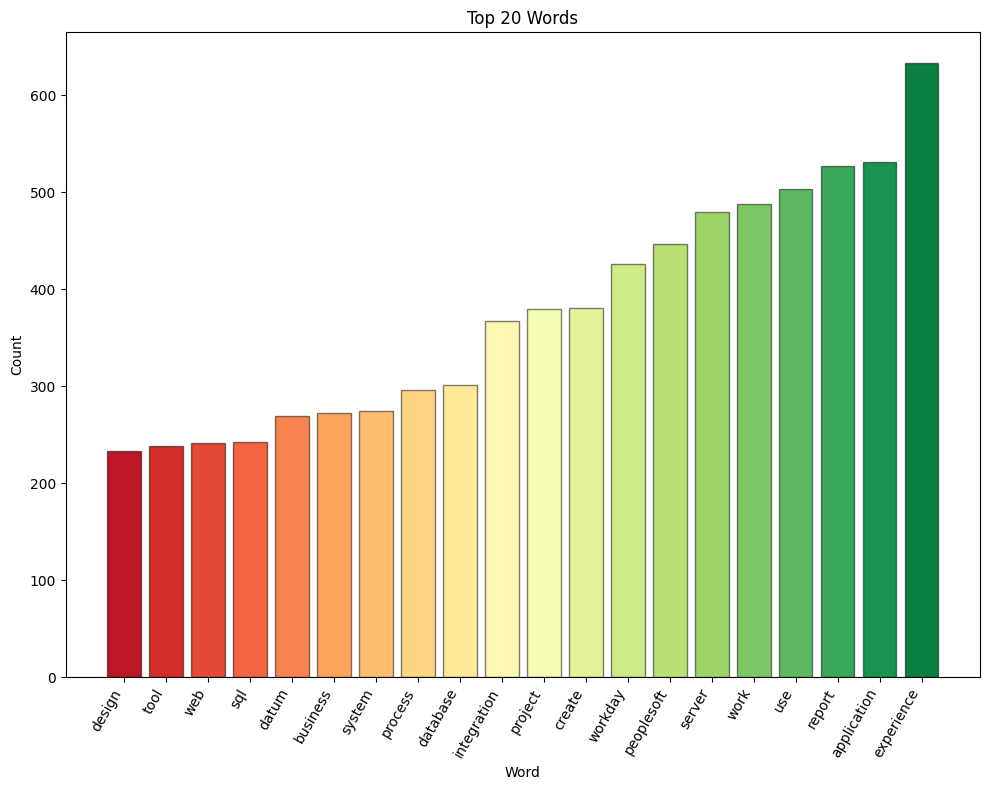

In [34]:
n_colors = 20
colors = sns.color_palette('RdYlGn', n_colors=n_colors)
top_words = [word for word, count in mostcommon[:20]]
word_counts = [count for word, count in mostcommon[:20]]
top_words = top_words[::-1]
word_counts = word_counts[::-1]


plt.figure(figsize=(10, 8))
bars = plt.bar(top_words, word_counts, color=colors, edgecolor='k', linewidth=2)
for bar in bars:
    bar.set_edgecolor((0, 0, 0, 0.5))
    bar.set_linewidth(1)

plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 20 Words')
plt.xticks(rotation=60, ha='right') 
plt.tight_layout()
plt.show()


3.6 Word Cloud

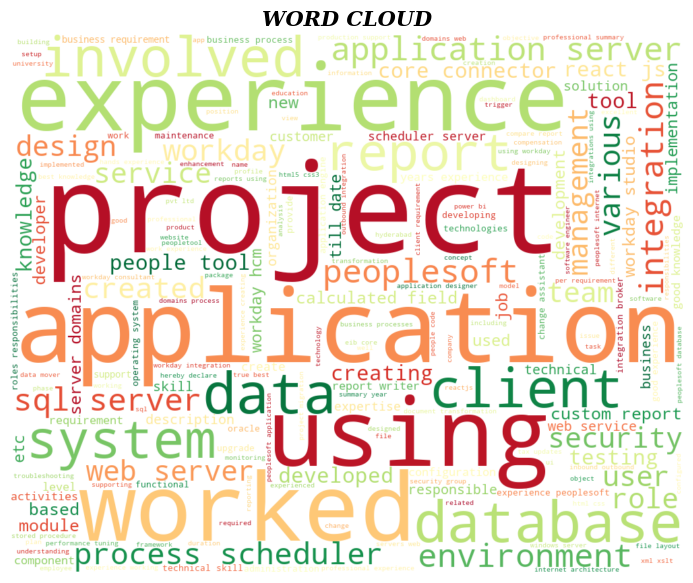

In [35]:
one_block = ' '.join(cleaned)  # Convert list of words to a string
doc_block = nlp(one_block)
wordcloud = WordCloud(width=1000, height=800, random_state=10,background_color='white', colormap="RdYlGn").generate(str(doc_block))
plt.figure(figsize=(10, 7))
plt.title('WORD CLOUD',family= 'serif', fontsize= 15, weight= 'bold', style ='italic')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

3.7 Parts of Speech Recognition

In [36]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

4. Transforming Text data for model building

In [37]:
tfidf= TfidfVectorizer(sublinear_tf=True,stop_words='english')
label_encoder = LabelEncoder()

x = tfidf.fit_transform(cleaned_data['clean_resume'])
y = label_encoder.fit_transform(cleaned_data['category'])

In [38]:
x.shape

(79, 5126)

In [39]:
y.shape

(79,)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.33)

5.Model Building

5.1 Logistic Regression

In [41]:
models_logreg = []

C_values = [0.1, 1, 5, 10, 20, 30]

results = []
for C in C_values:
    logreg = LogisticRegression(C=C, random_state=1)
    logreg.fit(x_train, y_train)
    models_logreg.append(logreg)
    
    # Generate classification report for the model
    y_pred = logreg.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy_train = logreg.score(x_train, y_train)
    accuracy_test = report['accuracy']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    precision = report['macro avg']['precision']
    results.append({'Model': logreg, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_logreg = pd.DataFrame(results)
df_logreg_sorted = df_logreg.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_log = df_logreg_sorted[:1]
df_logreg_sorted[:10]

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
2,"LogisticRegression(C=5, random_state=1)",1.000000,0.962963,0.950000,0.950000,0.944444
3,"LogisticRegression(C=10, random_state=1)",1.000000,0.962963,0.950000,0.950000,0.944444
4,"LogisticRegression(C=20, random_state=1)",1.000000,0.962963,0.950000,0.950000,0.944444
5,"LogisticRegression(C=30, random_state=1)",1.000000,0.962963,0.950000,0.950000,0.944444
1,"LogisticRegression(C=1, random_state=1)",1.000000,0.666667,0.826923,0.661111,0.604827
0,"LogisticRegression(C=0.1, random_state=1)",0.384615,0.148148,0.037037,0.250000,0.064516


5.1.1 Logistic regression - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      1.00      0.89         4
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9

    accuracy                           0.96        27
   macro avg       0.95      0.95      0.94        27
weighted avg       0.97      0.96      0.96        27



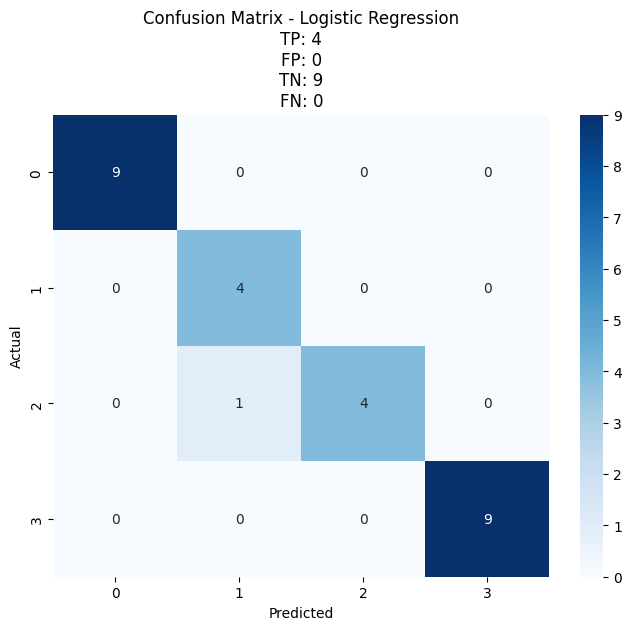

In [42]:
model_index = df_logreg_sorted['Recall'].idxmax()
log_best_model = models_logreg[model_index]
log_best_model.fit(x_train, y_train)
y_log = log_best_model.predict(x_test)
print(classification_report(y_test, y_log))

cm_log = confusion_matrix(y_test, y_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
tp = cm_log[1, 1]
fp = cm_log[0, 1]
tn = cm_log[0, 0]
fn = cm_log[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))
plt.show()

5.2 Decision Tree

In [43]:
models_DT = []
results = []

# Defining Parameters
max_depths = [3, 4, 5, 6, 7]
max_features = ['sqrt', 'log2', None]
min_samples_leafs = [1, 2, 3, 5, 10]
max_leaf_nodes = [5, 10, 15, 20]

for max_depth in max_depths:
    for max_feature in max_features:
        for min_samples_leaf in min_samples_leafs:
            for max_leaf_node in max_leaf_nodes:
                DT = DecisionTreeClassifier(criterion='gini', max_depth=max_depth,
                                               max_features=max_feature, min_samples_leaf=min_samples_leaf,
                                               max_leaf_nodes=max_leaf_node, random_state=1)
                DT.fit(x_train, y_train)
                models_DT.append(DT)
                
                y_pred = DT.predict(x_test)
                report = classification_report(y_test, y_pred, output_dict=True)
                accuracy_train = DT.score(x_train, y_train)
                accuracy_test = report['accuracy']
                recall = report['macro avg']['recall']
                f1_score = report['macro avg']['f1-score']
                precision = report['macro avg']['precision']
                results.append({'Model': DT, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score })

df_DT = pd.DataFrame(results)
df_DT_sorted = df_DT.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_DT = df_DT_sorted[:1]
df_DT_sorted[:5]

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
40,"DecisionTreeClassifier(max_depth=3, max_leaf_n...",0.942308,0.925926,0.928571,0.944444,0.927083
41,"DecisionTreeClassifier(max_depth=3, max_leaf_n...",0.942308,0.925926,0.928571,0.944444,0.927083
42,"DecisionTreeClassifier(max_depth=3, max_leaf_n...",0.942308,0.925926,0.928571,0.944444,0.927083
43,"DecisionTreeClassifier(max_depth=3, max_leaf_n...",0.942308,0.925926,0.928571,0.944444,0.927083
44,"DecisionTreeClassifier(max_depth=3, max_leaf_n...",0.942308,0.925926,0.928571,0.944444,0.927083


5.2.1 Decision Tree - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      1.00      0.89         4
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9

    accuracy                           0.96        27
   macro avg       0.95      0.95      0.94        27
weighted avg       0.97      0.96      0.96        27



Text(0.5, 1.0, 'Confusion Matrix - Decision Tree\nTP: 4\nFP: 0\nTN: 7\nFN: 0')

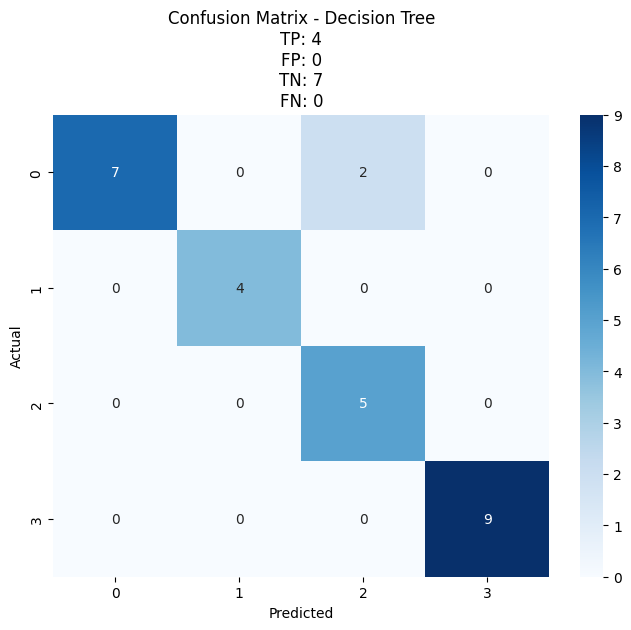

In [44]:
model_index = df_DT_sorted['Recall'].idxmax()
DT_best = models_DT[model_index]
DT_best.fit(x_train, y_train)
y_dt = DT_best.predict(x_test)
print(classification_report(y_test, y_log))

cm_DT = confusion_matrix(y_test, y_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues')
tp = cm_DT[1, 1]
fp = cm_DT[0, 1]
tn = cm_DT[0, 0]
fn = cm_DT[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))


5.3 Random Forest Classifier

In [45]:
models_RF = []
results = []

# Define parameters
n_estimators = [50, 100, 150]
max_depths = [5, 10, 15]
min_samples_leafs = [1, 2, 3]
max_features = ['sqrt', 'log2']

for n_estimator in n_estimators:
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leafs:
            for max_feature in max_features:
                RF = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth,
                                            min_samples_leaf=min_samples_leaf, max_features=max_feature,
                                            random_state=1)
                RF.fit(x_train, y_train)
                models_RF.append(RF)
                
                # Generate classification report for the model
                y_pred = RF.predict(x_test)
                report = classification_report(y_test, y_pred, output_dict=True)
                accuracy_train = RF.score(x_train, y_train)
                accuracy_test = report['accuracy']
                recall = report['macro avg']['recall']
                f1_score = report['macro avg']['f1-score']
                precision = report['macro avg']['precision']
                results.append({'Model': str(RF),'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_RF = pd.DataFrame(results)
df_RF_sorted = df_RF.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_RF = df_RF_sorted[:1]
df_RF_sorted[:5]

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
8,"RandomForestClassifier(max_depth=10, min_sampl...",1.0,0.962963,0.95,0.972222,0.957516
14,"RandomForestClassifier(max_depth=15, min_sampl...",1.0,0.962963,0.95,0.972222,0.957516
4,"RandomForestClassifier(max_depth=5, min_sample...",1.0,0.962963,0.95,0.950000,0.944444
10,"RandomForestClassifier(max_depth=10, min_sampl...",1.0,0.962963,0.95,0.950000,0.944444
16,"RandomForestClassifier(max_depth=15, min_sampl...",1.0,0.962963,0.95,0.950000,0.944444


5.3.1 Random forest classifier - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



Text(0.5, 1.0, 'Confusion Matrix - RandomForestClassifier\nTP: 4\nFP: 1\nTN: 8\nFN: 0')

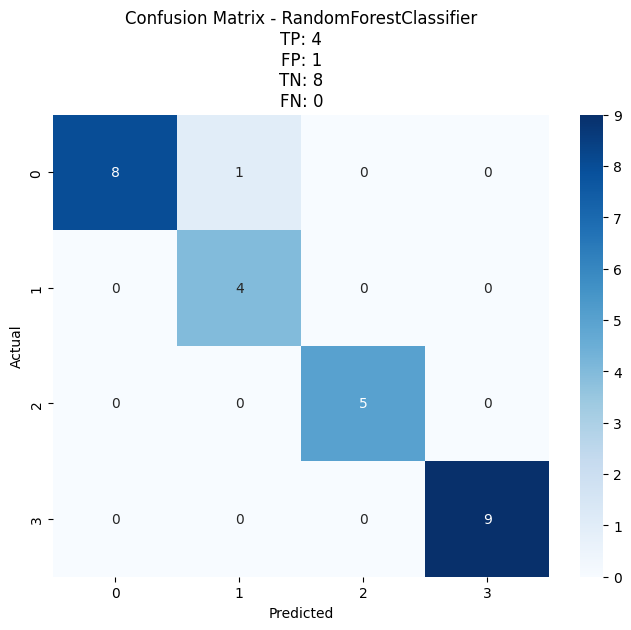

In [46]:
model_index = df_RF_sorted['Recall'].idxmax()
RFC_best_model = models_RF[model_index]
RFC_best_model.fit(x_train, y_train)
y_rfc = RFC_best_model.predict(x_test)
print(classification_report(y_test, y_rfc))

cm_RFC = confusion_matrix(y_test, y_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RFC, annot=True, fmt='d', cmap='Blues')

tp = cm_RFC[1, 1]
fp = cm_RFC[0, 1]
tn = cm_RFC[0, 0]
fn = cm_RFC[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RandomForestClassifier\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))


5.4 Ada Boost

In [47]:
models_ada = []
results = []


n_estimators = [50, 100, 200, 500, 1000]
learning_rates = [0.1,0.33, 0.5, 1.0]

for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        ada = AdaBoostClassifier(n_estimators=n_estimator, learning_rate=learning_rate, random_state=1)
        ada.fit(x_train, y_train)
        models_ada.append(ada)
        
        # Generate classification report for the model
        y_pred = ada.predict(x_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy_train = ada.score(x_train, y_train)
        accuracy_test = report['accuracy']
        recall = report['macro avg']['recall']
        f1_score = report['macro avg']['f1-score']
        precision = report['macro avg']['precision']
        results.append({'Model': str(ada),'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_ada = pd.DataFrame(results)
df_ada_sorted = df_ada.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_ada = df_ada_sorted[:1]
df_ada_sorted[:5]

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
0,"AdaBoostClassifier(learning_rate=0.1, random_s...",1.0,1.0,1.0,1.0,1.0
1,"AdaBoostClassifier(learning_rate=0.33, random_...",1.0,1.0,1.0,1.0,1.0
4,"AdaBoostClassifier(learning_rate=0.1, n_estima...",1.0,1.0,1.0,1.0,1.0
5,"AdaBoostClassifier(learning_rate=0.33, n_estim...",1.0,1.0,1.0,1.0,1.0
8,"AdaBoostClassifier(learning_rate=0.1, n_estima...",1.0,1.0,1.0,1.0,1.0


5.4.1 Ada Boost - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



Text(0.5, 1.0, 'Confusion Matrix - AdaBoost\nTP: 4\nFP: 0\nTN: 9\nFN: 0')

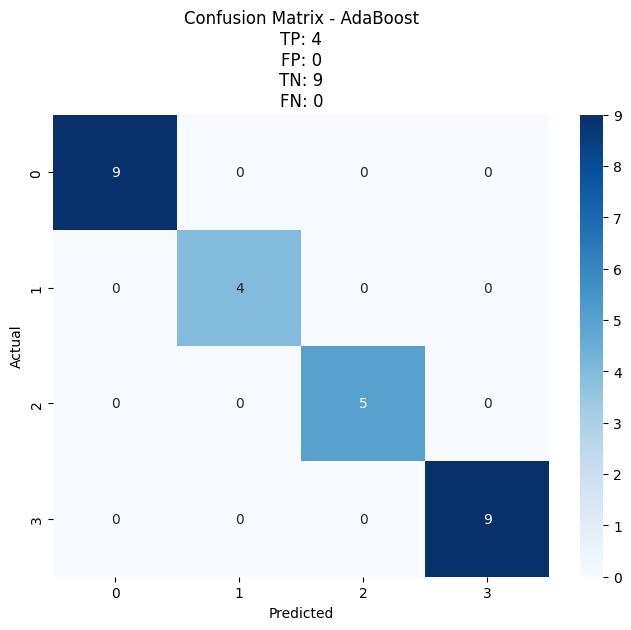

In [48]:
model_index = df_ada_sorted['Recall'].idxmax()
ada_best_model = models_ada[model_index]
ada_best_model.fit(x_train, y_train)
y_ada = ada_best_model.predict(x_test)
print(classification_report(y_test, y_ada))

cm_ada = confusion_matrix(y_test, y_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues')

tp = cm_ada[1, 1]
fp = cm_ada[0, 1]
tn = cm_ada[0, 0]
fn = cm_ada[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))


5.5 Gradient Boost

In [49]:
GB_model = []
result_gb = []


# Define parameters
n_estimators = [100,250, 500]
learning_rates = [0.1, 0.33, 0.5, 1.0]
max_depths = [3,  5, 7, 9]

for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        for max_depth in max_depths:
            GB = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate=learning_rate, max_depth=max_depth, random_state=1)
            GB.fit(x_train, y_train)
            GB_model.append(GB)

            y_pred = GB.predict(x_test)
            report = classification_report(y_test, y_pred, output_dict=True)
            accuracy_test = GB.score(x_train, y_train)
            accuracy_test = report['accuracy']
            recall = report['macro avg']['recall']
            f1_score = report['macro avg']['f1-score']
            precision = report['macro avg']['precision']
            result_gb.append({'Model':str(GB), 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_GB = pd.DataFrame(result_gb)
df_GB_sorted = df_GB.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_GB = df_GB_sorted[:1]
df_GB_sorted[:5]

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
0,GradientBoostingClassifier(random_state=1),0.942308,1.0,1.0,1.0,1.0
1,"GradientBoostingClassifier(max_depth=5, random...",0.942308,1.0,1.0,1.0,1.0
2,"GradientBoostingClassifier(max_depth=7, random...",0.942308,1.0,1.0,1.0,1.0
3,"GradientBoostingClassifier(max_depth=9, random...",0.942308,1.0,1.0,1.0,1.0
5,"GradientBoostingClassifier(learning_rate=0.33,...",0.942308,1.0,1.0,1.0,1.0


5.5.1 Gradient Boost - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



Text(0.5, 1.0, 'Confusion Matrix - Gradient Boosting technique\nTP: 4\nFP: 0\nTN: 9\nFN: 0')

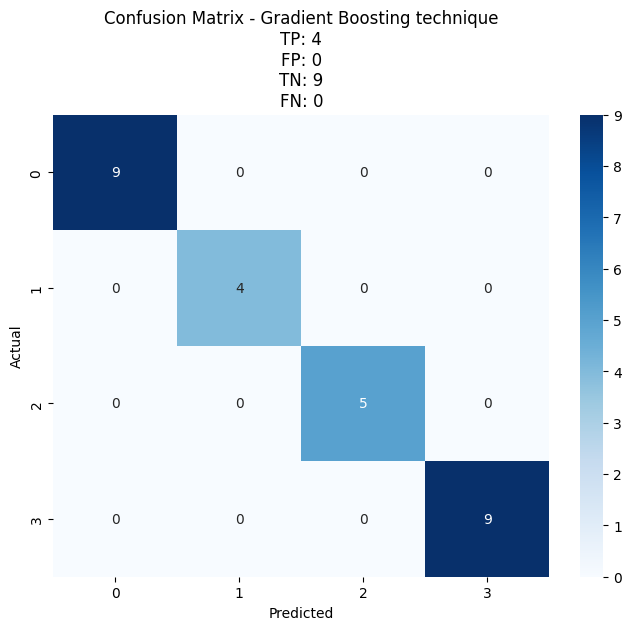

In [50]:
model_index = df_GB_sorted['Recall'].idxmax()
GB_model_model = GB_model[model_index]
GB_model_model.fit(x_train, y_train)
y_gb = GB_model_model.predict(x_test)
print(classification_report(y_test, y_gb))

cm_GB = confusion_matrix(y_test, y_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_GB, annot=True, fmt='d', cmap='Blues')

tp = cm_GB[1, 1]
fp = cm_GB[0, 1]
tn = cm_GB[0, 0]
fn = cm_GB[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting technique\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))

5.6 XG Boost

In [51]:
XGB_model = []
results = []

# Define parameters
n_estimators = [100, 250, 500, 1000]
learning_rates = [0.1, 0.33, 0.5, 1.0]
max_depths = [3, 5, 7, 9, 12]

for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        for max_depth in max_depths:
            XGB = XGBClassifier(n_estimators=n_estimator, learning_rate=learning_rate, max_depth=max_depth, random_state=1)
            XGB.fit(x_train, y_train)
            XGB_model.append(XGB)

            y_pred = XGB.predict(x_test)
            report = classification_report(y_test, y_pred, output_dict=True)
            accuracy_test = XGB.score(x_test, y_test) 
            accuracy_test = report['accuracy']
            recall = report['macro avg']['recall']
            f1_score = report['macro avg']['f1-score']
            precision = report['macro avg']['precision']
            results.append({'Model':XGB, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_XGB = pd.DataFrame(results)

df_XGB_sorted = df_XGB.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_XGB = df_XGB_sorted[:1]
df_XGB_sorted[:5]

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
0,"XGBClassifier(base_score=None, booster=None, c...",0.942308,0.925926,0.916667,0.9,0.8875
1,"XGBClassifier(base_score=None, booster=None, c...",0.942308,0.925926,0.916667,0.9,0.8875
2,"XGBClassifier(base_score=None, booster=None, c...",0.942308,0.925926,0.916667,0.9,0.8875
3,"XGBClassifier(base_score=None, booster=None, c...",0.942308,0.925926,0.916667,0.9,0.8875
4,"XGBClassifier(base_score=None, booster=None, c...",0.942308,0.925926,0.916667,0.9,0.8875


5.6.1 XG Boost - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.67      1.00      0.80         4
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         9

    accuracy                           0.93        27
   macro avg       0.92      0.90      0.89        27
weighted avg       0.95      0.93      0.92        27



Text(0.5, 1.0, 'Confusion Matrix - Xtra Gradient Boosting technique\nTP: 4\nFP: 0\nTN: 9\nFN: 0')

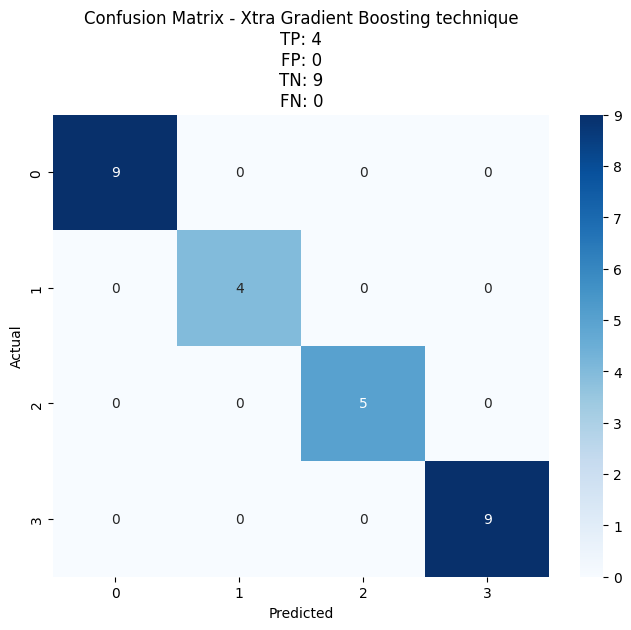

In [52]:
XGB_best_model = XGB_model[model_index]
XGB_best_model.fit(x_train, y_train)
y_xgb = XGB_best_model.predict(x_test)
print(classification_report(y_test, y_xgb))

cm_XGB = confusion_matrix(y_test, y_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_GB, annot=True, fmt='d', cmap='Blues')
tp = cm_XGB[1, 1]
fp = cm_XGB[0, 1]
tn = cm_XGB[0, 0]
fn = cm_XGB[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Xtra Gradient Boosting technique\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))

5.7 KNN

In [53]:
KNN_model = []
results = []

# Define parameters
n_neighbors = [3, 5, 7, 9]
weights = ['uniform', 'distance']

# Create and train the KNN models
for n_neighbor in n_neighbors:
    for weight in weights:
        KNN = KNeighborsClassifier(n_neighbors=n_neighbor, weights=weight)
        KNN.fit(x_train, y_train)
        KNN_model.append(KNN)

        y_pred = KNN.predict(x_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy_train = KNN.score(x_train,y_train)
        accuracy_test = report['accuracy']
        recall = report['macro avg']['recall']
        f1_score = report['macro avg']['f1-score']
        precision = report['macro avg']['precision']
        results.append({'Model': KNN,'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_KNN = pd.DataFrame(results)
df_KNN_sorted = df_KNN.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_KNN = df_KNN_sorted[:1]
df_KNN_sorted[:5]

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
1,"KNeighborsClassifier(n_neighbors=3, weights='d...",1.000000,1.000000,1.000000,1.000000,1.00000
0,KNeighborsClassifier(n_neighbors=3),0.961538,1.000000,1.000000,1.000000,1.00000
3,KNeighborsClassifier(weights='distance'),1.000000,0.925926,0.954545,0.944444,0.94375
5,"KNeighborsClassifier(n_neighbors=7, weights='d...",1.000000,0.925926,0.954545,0.944444,0.94375
7,"KNeighborsClassifier(n_neighbors=9, weights='d...",1.000000,0.925926,0.954545,0.944444,0.94375


5.7.1 KNN - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



Text(0.5, 1.0, 'Confusion Matrix - KNN\nTP: 4\nFP: 0\nTN: 9\nFN: 0')

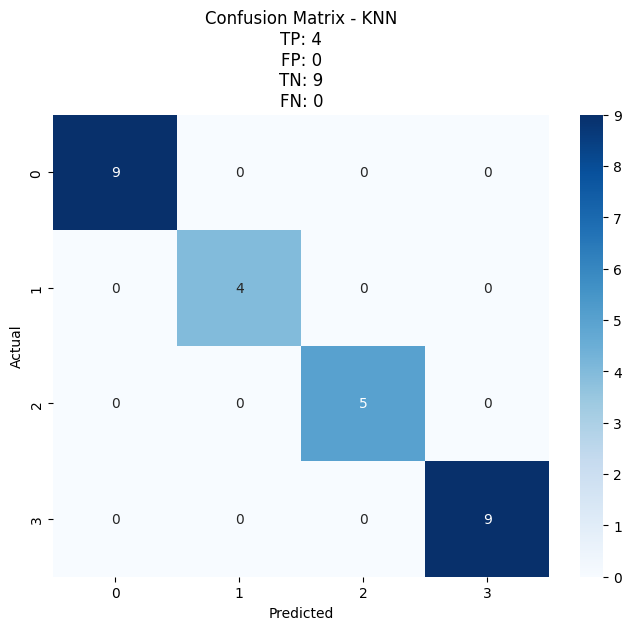

In [54]:
model_index = df_KNN_sorted['Recall'].idxmax()
KNN_best_model = KNN_model[model_index]
KNN_best_model.fit(x_train, y_train)
y_knn = KNN_best_model.predict(x_test)
print(classification_report(y_test,y_knn))

cm_knn = confusion_matrix(y_test, y_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')

tp = cm_knn[1, 1]
fp = cm_knn[0, 1]
tn = cm_knn[0, 0]
fn = cm_knn[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))

5.8 SVM

In [55]:
SVM_model = []
results = []

# Define parameters
C_values = [0.1, 1, 10, 100, 500, 1000]
kernels = ['linear', 'rbf']

# Create and train the SVM models
for C_value in C_values:
    for kernel in kernels:
        SVM = SVC(C=C_value, kernel=kernel, random_state=1)
        SVM.fit(x_train, y_train)
        SVM_model.append(SVM)

        y_pred = SVM.predict(x_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy_train = SVM.score(x_train, y_train)
        accuracy_test = report['accuracy']
        recall = report['macro avg']['recall']
        f1_score = report['macro avg']['f1-score']
        precision = report['macro avg']['precision']
        results.append({'Model': str(SVM),'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_SVM = pd.DataFrame(results)
df_SVM_sorted = df_SVM.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_SVM = df_SVM_sorted[:1]
df_SVM_sorted[:5]

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
2,"SVC(C=1, kernel='linear', random_state=1)",1.0,0.962963,0.95,0.95,0.944444
4,"SVC(C=10, kernel='linear', random_state=1)",1.0,0.962963,0.95,0.95,0.944444
6,"SVC(C=100, kernel='linear', random_state=1)",1.0,0.962963,0.95,0.95,0.944444
8,"SVC(C=500, kernel='linear', random_state=1)",1.0,0.962963,0.95,0.95,0.944444
10,"SVC(C=1000, kernel='linear', random_state=1)",1.0,0.962963,0.95,0.95,0.944444


5.8.1 SVM - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.80      1.00      0.89         4
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9

    accuracy                           0.96        27
   macro avg       0.95      0.95      0.94        27
weighted avg       0.97      0.96      0.96        27



Text(0.5, 1.0, 'Confusion Matrix - SVM\nTP: 4\nFP: 0\nTN: 9\nFN: 0')

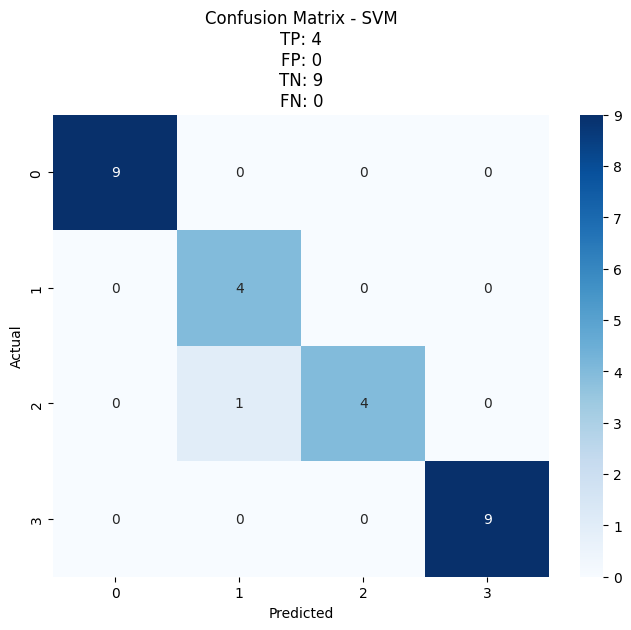

In [56]:
model_index = df_SVM_sorted['Recall'].idxmax()
SVM_best_model = SVM_model[model_index]
SVM_best_model.fit(x_train, y_train)
y_svm = SVM_best_model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_svm))

cm_svm = confusion_matrix(y_test, y_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')

tp = cm_svm[1, 1]
fp = cm_svm[0, 1]
tn = cm_svm[0, 0]
fn = cm_svm[1, 0]

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM\nTP: {}\nFP: {}\nTN: {}\nFN: {}'.format(tp, fp, tn, fn))


6. DataFrame of top models

In [57]:
dataframes = [top_log, top_DT, top_RF, top_ada, top_XGB, top_GB, top_KNN, top_SVM]
model_names = ['Logistic Regression','Decision Tree','Random Forest', 'Ada Boost', 'XG Boost' , 'Gradient Boost',  'KNN', 'SVM'  ]
df_combined = pd.concat(dataframes)
df_combined['Model'] = model_names
df_combined

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
2,Logistic Regression,1.000000,0.962963,0.950000,0.950000,0.944444
40,Decision Tree,0.942308,0.925926,0.928571,0.944444,0.927083
8,Random Forest,1.000000,0.962963,0.950000,0.972222,0.957516
0,Ada Boost,1.000000,1.000000,1.000000,1.000000,1.000000
0,XG Boost,0.942308,0.925926,0.916667,0.900000,0.887500
0,Gradient Boost,0.942308,1.000000,1.000000,1.000000,1.000000
1,KNN,1.000000,1.000000,1.000000,1.000000,1.000000
2,SVM,1.000000,0.962963,0.950000,0.950000,0.944444


In [58]:
# Sorting by the best recall rate, precision, f1-score and then by test accuracy and next by train accuracy
# index is kept same to pull the model number straight

df_sorted = df_combined.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
df_sorted

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
0,Ada Boost,1.000000,1.000000,1.000000,1.000000,1.000000
1,KNN,1.000000,1.000000,1.000000,1.000000,1.000000
0,Gradient Boost,0.942308,1.000000,1.000000,1.000000,1.000000
8,Random Forest,1.000000,0.962963,0.950000,0.972222,0.957516
2,Logistic Regression,1.000000,0.962963,0.950000,0.950000,0.944444
2,SVM,1.000000,0.962963,0.950000,0.950000,0.944444
40,Decision Tree,0.942308,0.925926,0.928571,0.944444,0.927083
0,XG Boost,0.942308,0.925926,0.916667,0.900000,0.887500


7. Model Valuation

In [59]:
# list of models
models = [('Ada Boost',ada_best_model),('KNN', KNN_best_model),('Gradient Boost', GB_model_model), ('Random Forest', RFC_best_model) ,('Logistic Regression', log_best_model),('Decision Tree', DT_best),('XG Boost', XGB_best_model),("SVM", SVM_best_model) ]
models

[('Ada Boost', AdaBoostClassifier(learning_rate=0.1, random_state=1)),
 ('KNN', KNeighborsClassifier(n_neighbors=3, weights='distance')),
 ('Gradient Boost', GradientBoostingClassifier(random_state=1)),
 ('Random Forest',
  RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=50,
                         random_state=1)),
 ('Logistic Regression', LogisticRegression(C=5, random_state=1)),
 ('Decision Tree',
  DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, random_state=1)),
 ('XG Boost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_o

7.1 K-Fold Cross Validation

In [62]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_result = []
for model_name, model in models:
    kf_scores = []
    
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        kf_scores.append(accuracy) 
    
    kf_mean_accuracy = sum(kf_scores) / len(kf_scores)
    kf_result.append({'Model': model_name, 'KF Mean Accuracy': kf_mean_accuracy, 'KF Accuracy Scores': kf_scores})

kf_df = pd.DataFrame(kf_result)
kf_sorted = kf_df.sort_values(by='KF Mean Accuracy', ascending=False)
kf_sorted

,Model,KF Mean Accuracy,KF Accuracy Scores
1,KNN,0.975000,"[1.0, 1.0, 0.9375, 0.9375, 1.0]"
7,SVM,0.975000,"[1.0, 1.0, 1.0, 0.875, 1.0]"
5,Decision Tree,0.974167,"[1.0, 0.9375, 1.0, 1.0, 0.9333333333333333]"
6,XG Boost,0.974167,"[1.0, 1.0, 1.0, 0.9375, 0.9333333333333333]"
3,Random Forest,0.962500,"[1.0, 0.875, 1.0, 0.9375, 1.0]"
0,Ada Boost,0.961667,"[1.0, 1.0, 0.9375, 0.9375, 0.9333333333333333]"
4,Logistic Regression,0.950000,"[1.0, 0.875, 1.0, 0.875, 1.0]"
2,Gradient Boost,0.948333,"[0.9375, 1.0, 0.9375, 1.0, 0.8666666666666667]"


7.2 Stratified K-Fold Cross Validation

In [63]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

skf_result = []
for model_name, model in models:
    skf_score = []
    
    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        skf_score.append(accuracy)
    
    skf_mean_accuracy = sum(skf_score) / len(skf_score)
    skf_result.append({'Model': model_name, 'SKF Mean Accuracy': skf_mean_accuracy, 'SKF Accuracy Scores': skf_score})

skf_df = pd.DataFrame(skf_result)
skf_sorted = skf_df.sort_values(by='SKF Mean Accuracy', ascending=False)
skf_sorted

,Model,SKF Mean Accuracy,SKF Accuracy Scores
5,Decision Tree,1.000000,"[1.0, 1.0, 1.0, 1.0, 1.0]"
1,KNN,0.986667,"[1.0, 1.0, 1.0, 1.0, 0.9333333333333333]"
7,SVM,0.975000,"[0.9375, 1.0, 0.9375, 1.0, 1.0]"
2,Gradient Boost,0.962500,"[0.875, 1.0, 1.0, 0.9375, 1.0]"
3,Random Forest,0.962500,"[0.875, 1.0, 0.9375, 1.0, 1.0]"
6,XG Boost,0.962500,"[0.9375, 1.0, 1.0, 0.875, 1.0]"
4,Logistic Regression,0.949167,"[0.875, 1.0, 0.9375, 1.0, 0.9333333333333333]"
0,Ada Boost,0.911667,"[0.875, 1.0, 0.875, 0.875, 0.9333333333333333]"


8. Final Valuation

In [64]:
accuracy = pd.merge(df_sorted,kf_sorted, on = 'Model' )
accuracy = pd.merge(accuracy, skf_sorted, on = 'Model')
accuracy.drop(columns =['KF Accuracy Scores', 'SKF Accuracy Scores'],inplace = True)
final_valuation = accuracy.sort_values(by=['KF Mean Accuracy','SKF Mean Accuracy', "Recall", 'precision' ], ascending = False)
final_valuation.index = range(1, len(final_valuation)+1)
final_valuation

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score,KF Mean Accuracy,SKF Mean Accuracy
1,KNN,1.000000,1.000000,1.000000,1.000000,1.000000,0.975000,0.986667
2,SVM,1.000000,0.962963,0.950000,0.950000,0.944444,0.975000,0.975000
3,Decision Tree,0.942308,0.925926,0.928571,0.944444,0.927083,0.974167,1.000000
4,XG Boost,0.942308,0.925926,0.916667,0.900000,0.887500,0.974167,0.962500
5,Random Forest,1.000000,0.962963,0.950000,0.972222,0.957516,0.962500,0.962500
6,Ada Boost,1.000000,1.000000,1.000000,1.000000,1.000000,0.961667,0.911667
7,Logistic Regression,1.000000,0.962963,0.950000,0.950000,0.944444,0.950000,0.949167
8,Gradient Boost,0.942308,1.000000,1.000000,1.000000,1.000000,0.948333,0.962500
